In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('pollution_new.csv')
data.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,1/2/2010 0:00,129,-16,-4.0,1020.0,SE,1.79,0,0
1,1/2/2010 1:00,148,-15,-4.0,1020.0,SE,2.68,0,0
2,1/2/2010 2:00,159,-11,-5.0,1021.0,SE,3.57,0,0
3,1/2/2010 3:00,181,-7,-5.0,1022.0,SE,5.36,1,0
4,1/2/2010 4:00,138,-7,-5.0,1022.0,SE,6.25,2,0


In [3]:
def create_dataset(dataset, look_back):
    x_ds, y_ds = [], []
    for i in range(len(dataset) - look_back - 1):
        x_ds.append(dataset[i: (i + look_back), 0])
        y_ds.append(dataset[i + look_back, 0])
    return np.array(x_ds), np.array(y_ds)

In [4]:
series = data[['pollution']].values.astype('float32')

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)

In [6]:
time = np.array(range(len(data['pollution'])))

In [7]:
# series = series.reshape(-1)
print(series[:5])
print(series.shape)

[[0.12977867]
 [0.14889336]
 [0.15995975]
 [0.18209255]
 [0.13883299]]
(43799, 1)


In [8]:
split_time = 365 * 24 * 4

time_train = time[: split_time]
series_train = series[: split_time]

time_valid = time[split_time: ]
series_valid = series[split_time: ]

In [9]:
look_back = 1

x_train, y_train = create_dataset(series_train, look_back)
x_test, y_test = create_dataset(series_valid, look_back)

In [10]:
len(series_train)

35040

In [11]:
print(x_train[:10])

[[0.12977867]
 [0.14889336]
 [0.15995975]
 [0.18209255]
 [0.13883299]
 [0.10965794]
 [0.1056338 ]
 [0.12474848]
 [0.12072434]
 [0.13279678]]


In [28]:
def plot_series(time, series, start = 0, end = None, sign = '-'):
    plt.plot(time[start:end], series[start:end], sign)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)

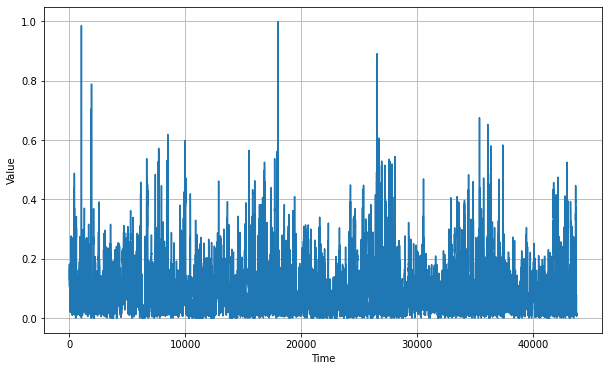

In [13]:
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100)
])

model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['mae'])

history = model.fit(x_train, y_train,
                   validation_data = (x_test, y_test),
                   epochs = 100)

Epoch 1/100
1095/1095 [==============================] - 8s 4ms/step - loss: 0.0017 - mae: 0.0232 - val_loss: 7.0920e-04 - val_mae: 0.0160
Epoch 2/100
1095/1095 [==============================] - 3s 3ms/step - loss: 0.0011 - mae: 0.0209 - val_loss: 8.4640e-04 - val_mae: 0.0193
Epoch 3/100
1095/1095 [==============================] - 3s 3ms/step - loss: 0.0011 - mae: 0.0202 - val_loss: 6.2252e-04 - val_mae: 0.0133
Epoch 4/100
1095/1095 [==============================] - 2s 2ms/step - loss: 9.9874e-04 - mae: 0.0190 - val_loss: 0.0016 - val_mae: 0.0327
Epoch 5/100
1095/1095 [==============================] - 2s 2ms/step - loss: 9.6939e-04 - mae: 0.0186 - val_loss: 7.5528e-04 - val_mae: 0.0184
Epoch 6/100
1095/1095 [==============================] - 3s 2ms/step - loss: 9.5946e-04 - mae: 0.0184 - val_loss: 6.1518e-04 - val_mae: 0.0137
Epoch 7/100
1095/1095 [==============================] - 4s 3ms/step - loss: 9.6595e-04 - mae: 0.0185 - val_loss: 0.0013 - val_mae: 0.0291
Epoch 8/100
1095/10

1095/1095 [==============================] - 3s 2ms/step - loss: 9.2333e-04 - mae: 0.0177 - val_loss: 7.7593e-04 - val_mae: 0.0189
Epoch 59/100
1095/1095 [==============================] - 3s 2ms/step - loss: 8.9353e-04 - mae: 0.0169 - val_loss: 8.9649e-04 - val_mae: 0.0216
Epoch 60/100
1095/1095 [==============================] - 3s 2ms/step - loss: 9.1485e-04 - mae: 0.0177 - val_loss: 6.0434e-04 - val_mae: 0.0129
Epoch 61/100
1095/1095 [==============================] - 3s 2ms/step - loss: 9.1825e-04 - mae: 0.0177 - val_loss: 6.0324e-04 - val_mae: 0.0127
Epoch 62/100
1095/1095 [==============================] - 3s 2ms/step - loss: 9.3239e-04 - mae: 0.0179 - val_loss: 6.2520e-04 - val_mae: 0.0136
Epoch 63/100
1095/1095 [==============================] - 2s 2ms/step - loss: 8.9165e-04 - mae: 0.0170 - val_loss: 7.8594e-04 - val_mae: 0.0175
Epoch 64/100
1095/1095 [==============================] - 3s 3ms/step - loss: 9.2110e-04 - mae: 0.0178 - val_loss: 0.0014 - val_mae: 0.0313
Epoch 65/

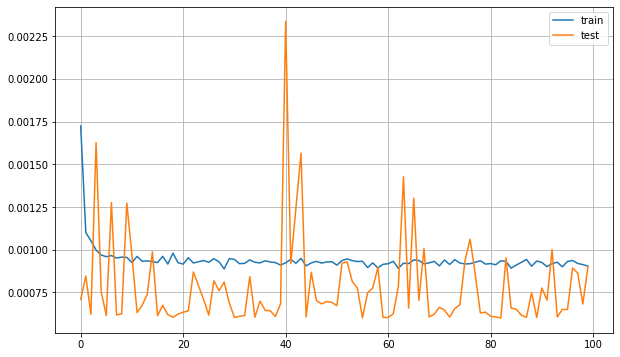

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.grid(True);

In [16]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [17]:
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform([y_train])

test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform([y_test])

In [18]:
train_pred.shape

(35038, 1)

In [19]:
test_mae = tf.keras.metrics.mean_absolute_error(y_test[0], test_pred[:, 0]).numpy()
test_mae

21.947334

In [20]:
forecast = []
for time in range(len(series) - look_back):
    forecast.append(model.predict(series[time: time + look_back][np.newaxis]))

In [21]:
forecast = forecast[split_time - look_back: ]
result = np.array(forecast)[:, 0, 0]

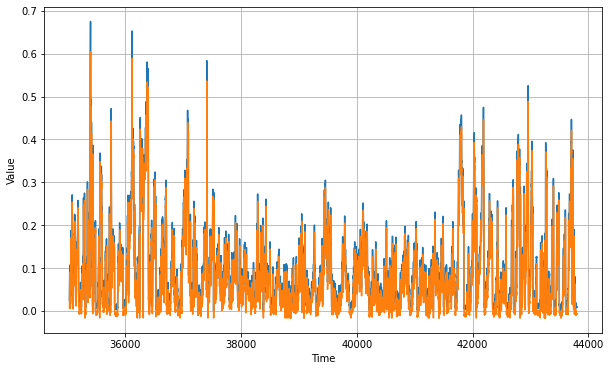

In [29]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, result)

In [35]:
tf.keras.metrics.mean_absolute_error(series_valid[:, 0], result).numpy()

0.022078501